In [2]:
import numpy as np
import matplotlib.pyplot as plt
from SuspensionParts import Wishbone
from SuspensionParts import Upright
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget

In [ ]:
# define chassis pickup points
# origin at center of rear axle on ground
# F/R - front/rear of car
# r/l - right/left
# U/L - upper/lower
# 1/2/3 - 1=front/2=rear/3=upright of the specific wishbone

x1 = np.array([0,0,1])
x2 = np.array([0,0,0])
x3 = np.array([1,0,0])

test_wishbone = Wishbone(x1, x2, x3)

# front right corner
# upper
FrU1 = np.array([1.9,-.4,.35])
FrU2 = np.array([1.7,-.4,.4])
FrU3 = np.array([1.8,-.6,.375])

# lower
FrL1 = np.array([1.9,-.4,.15])
FrL2 = np.array([1.7,-.4,.2])
FrL3 = np.array([1.8,-.6,.175])

FR_upper = Wishbone(FrU1, FrU2, FrU3)
FR_lower = Wishbone(FrL1, FrL2, FrL3)

In [6]:
def is_plane_orthogonal_to_axis(plane_pts, axis_pts, tol=1e-6):
    """
    Check if the plane defined by 3 points is orthogonal to the axis defined by 2 points.

    Parameters:
        plane_pts: np.ndarray of shape (3, 3) - three points defining the plane.
        axis_pts: np.ndarray of shape (2, 3) - two points defining the axis.
        tol: float - tolerance for checking orthogonality (default: 1e-6)

    Returns:
        bool - True if orthogonal, False otherwise.
    """

    # Vectors on the plane
    v1 = plane_pts[1] - plane_pts[0]
    v2 = plane_pts[2] - plane_pts[0]

    # Normal to the plane
    normal = np.cross(v1, v2)

    # Direction vector of the axis
    axis_vec = axis_pts[1] - axis_pts[0]

    # Normalize both vectors (optional for numerical stability)
    normal = normal / np.linalg.norm(normal)
    axis_vec = axis_vec / np.linalg.norm(axis_vec)

    # Check dot product
    dot_product = np.dot(normal, axis_vec)

    return abs(abs(dot_product) - 1) < tol

# ax = np.array([[0,0,1], [0,0,0]])
ax = np.array([[1.9,-.4,.35], [1.7,-.4,.4]])
print(is_plane_orthogonal_to_axis(balljoint_pos, ax, tol=1e-6))

True


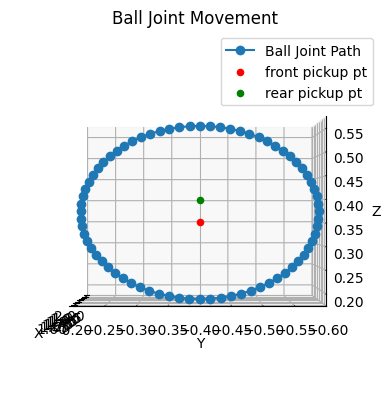

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Unpack x, y, z from balljoint_pos
x = balljoint_pos[:, 0]
y = balljoint_pos[:, 1]
z = balljoint_pos[:, 2]

# Plot the points
ax.plot3D(x, y, z, 'o-', label='Ball Joint Path')  # 'o-' for points connected with lines
ax.scatter(FrU1[0], FrU1[1], FrU1[2], color = 'red', label = 'front pickup pt')
ax.scatter(FrU2[0], FrU2[1], FrU2[2], color = 'green', label = 'rear pickup pt')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ball Joint Movement')
ax.legend()
# Set the view: positive X into page, -Y to the right, Z up
ax.view_init(elev=0, azim=180)

# Combine all points for axis range calculation
all_x = np.concatenate([x, [FrU1[0], FrU2[0]]])
all_y = np.concatenate([y, [FrU1[1], FrU2[1]]])
all_z = np.concatenate([z, [FrU1[2], FrU2[2]]])

# Compute ranges and midpoints
x_range = all_x.max() - all_x.min()
y_range = all_y.max() - all_y.min()
z_range = all_z.max() - all_z.min()
max_range = max(x_range, y_range, z_range)

x_middle = (all_x.max() + all_x.min()) / 2
y_middle = (all_y.max() + all_y.min()) / 2
z_middle = (all_z.max() + all_z.min()) / 2

ax.set_xlim(x_middle - max_range/2, x_middle + max_range/2)
ax.set_ylim(y_middle - max_range/2, y_middle + max_range/2)
ax.set_zlim(z_middle - max_range/2, z_middle + max_range/2)

plt.show()